# Time Series Analysis on Open Power Systems Data in Python

##  The data set includes Germary totals of electricity consumption, wind power production, and solar power production for 2006-2017

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

    Date — The date (yyyy-mm-dd format)
    Consumption — Electricity consumption in GWh
    Wind — Wind power production in GWh
    Solar — Solar power production in GWh
    Wind+Solar — Sum of wind and solar power production in GWh


# THE PROCESS:

In [1]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='http://www.seanabu.com/img/flowchart.png', width=700, height=700)

## Phase 0 — Data Exploration

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
opsd =pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv",sep=",")
opsd.shape

(4383, 5)

In [4]:
opsd.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [5]:
opsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [6]:
opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [7]:
opsd.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


The DataFrame has 4383 rows, covering the period from January 1, 2006 through December 31, 2017.

In [8]:
opsd.isnull().sum(axis=0)

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

### Creating a time series DataFrame

In [9]:
# Correct Date column as dateime type, and set it as index
opsd['Date']=pd.to_datetime(opsd['Date'],infer_datetime_format=True)
opsd_daily=opsd.set_index('Date')

In [10]:
opsd_daily.info()
opsd_daily.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4)
memory usage: 171.2 KB


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [11]:
# add few more attributes
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


## Phase 1 - Visualizing time series data

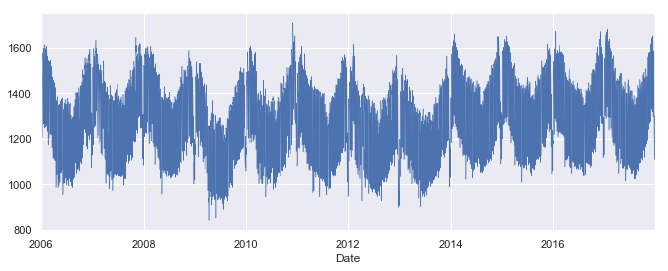

In [12]:
#import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
#import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
opsd_daily['Consumption'].plot(linewidth=0.5);

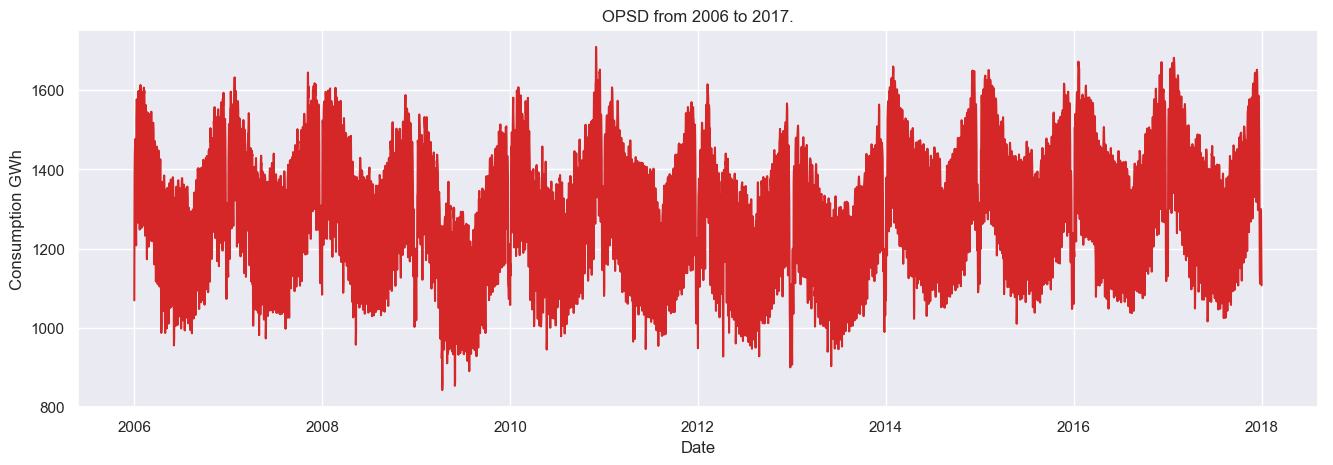

In [13]:
# Draw Plot
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Consumption GWh', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(opsd_daily, x=opsd_daily.index, y=opsd_daily.Consumption, title='OPSD from 2006 to 2017.')   

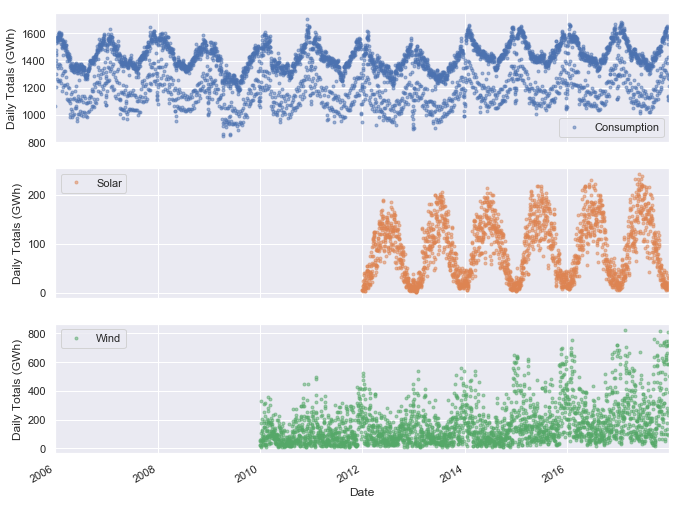

In [14]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

All three time series clearly exhibit periodicity—often referred to as seasonality in time series analysis—in which a pattern repeats again and again at regular time intervals. The Consumption, Solar, and Wind time series oscillate between high and low values on a yearly time scale. Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh.

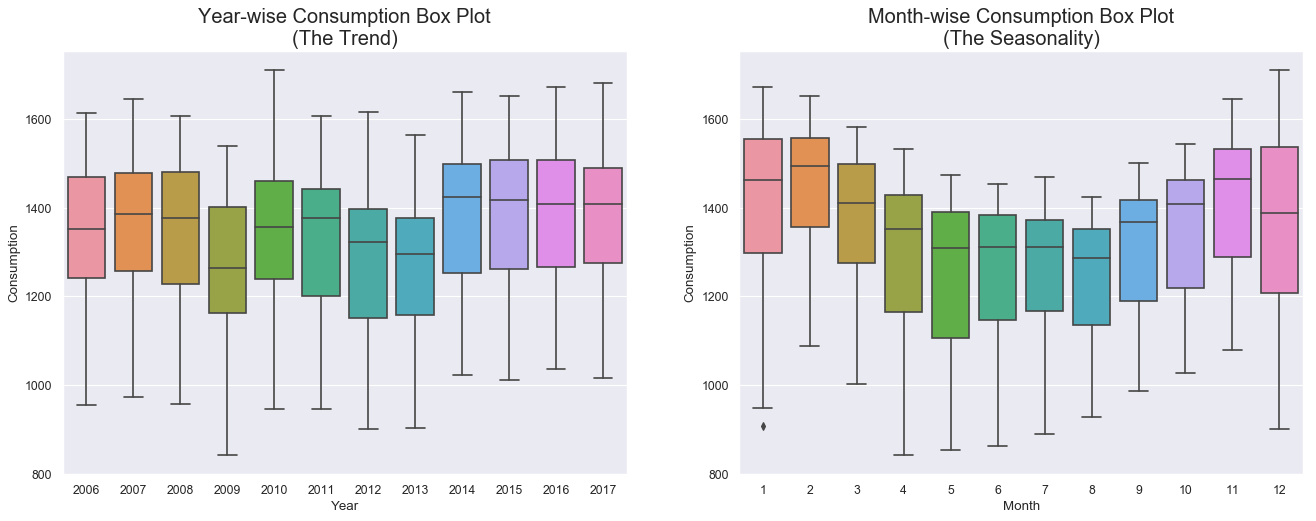

In [15]:
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Consumption', data=opsd_daily, ax=axes[0])
sns.boxplot(x='Month', y='Consumption', data=opsd_daily.loc[~opsd_daily.Year.isin([2006, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Consumption Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Consumption Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

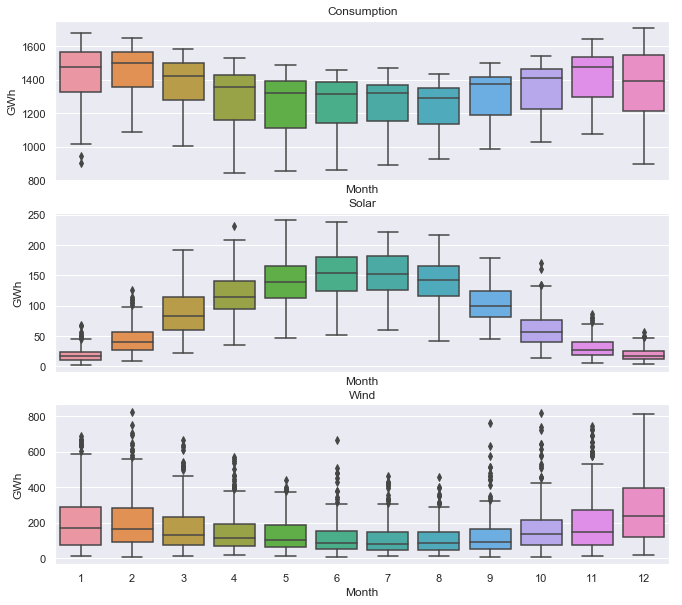

In [16]:
# Visualize using boxplots, group the data by month
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

Although electricity consumption is generally higher in winter and lower in summer, the median and lower two quartiles are lower in December and January compared to November and February.While solar and wind power production both exhibit a yearly seasonality, the wind power distributions have many more outliers, reflecting the effects of occasional extreme wind speeds associated with storms and other transient weather conditions.

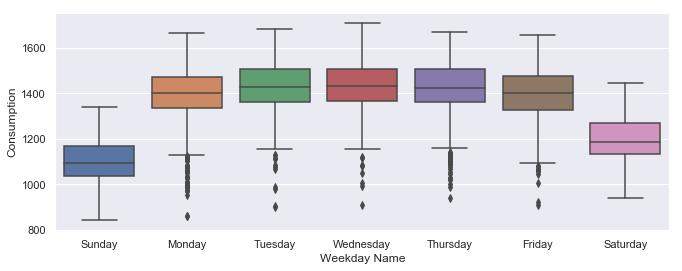

In [17]:
# group the electricity consumption time series by day of the week, to explore weekly seasonality
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

As expected, electricity consumption is significantly higher on weekdays than on weekends. 

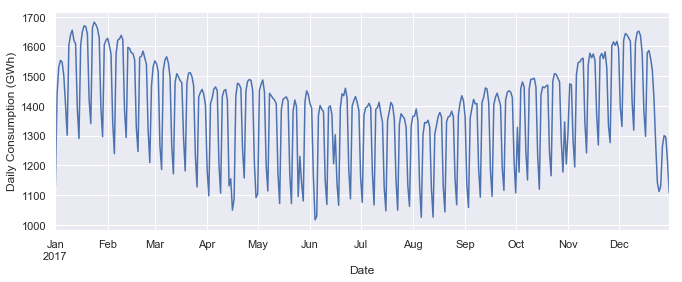

In [18]:
# Let’s plot the time series in a single year to investigate further
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

There drastic decrease in electricity consumption in early January and late December, during the holidays.

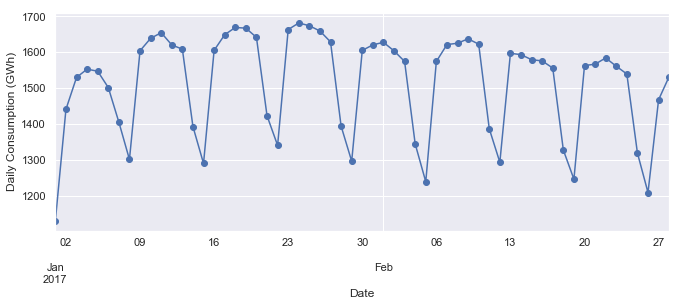

In [19]:
# Let’s zoom in further and look at just January and February.
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

Consumption is highest on weekdays and lowest on weekends.

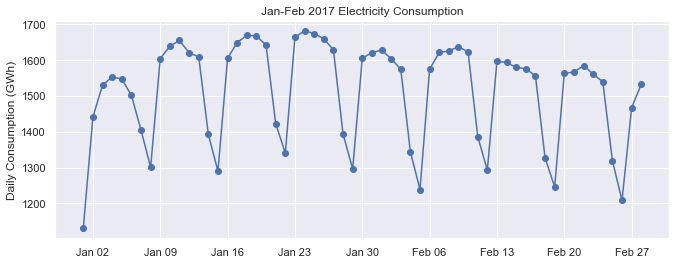

In [20]:
# Add vertical gridlines on a weekly time scale
# use mdates.WeekdayLocator() and mdates.MONDAY to set the x-axis ticks to the first Monday of each week. 
# We also use mdates.DateFormatter() to improve the formatting of the tick labels

import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Now we have vertical gridlines and nicely formatted tick labels on each Monday, so we can easily tell which days are weekdays and weekends.

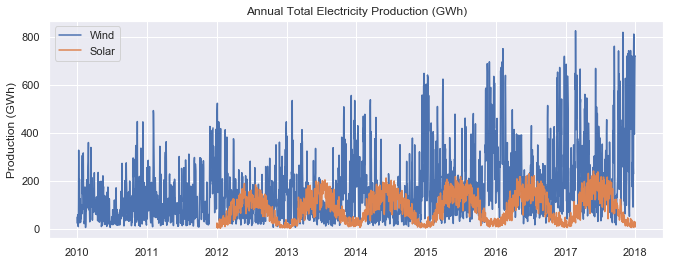

In [21]:
# Plot  time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar']:
    ax.plot(opsd_daily[nm], label=nm)

ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Annual Total Electricity Production (GWh)');

We observe large seasonal trends over time.

    The solar production is much smaller during winter times.
    The wind production is, however, larger during winter times, and the consumption as well.
    There is an increasing trend in the production of both solar and wind power over time.

### Different components of time series data

In [22]:
Image(url ='https://images.xenonstack.com/blog/xenonstack-time-series-data-components.png', width=700, height=700)

https://otexts.com/fpp2/tspatterns.html <br>

#### Trend
    A trend exists when there is a long-term increase or decrease in the data.
#### Seasonal
    A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known frequency.
#### Cyclic
    A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. 
    
Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of a fixed frequency then they are cyclic; if the frequency is unchanging and associated with some aspect of the calendar, then the pattern is seasonal. In general, the average length of cycles is longer than the length of a seasonal pattern, and the magnitudes of cycles tend to be more variable than the magnitudes of seasonal patterns.

Many time series include trend, cycles and seasonality. When choosing a forecasting method, we will first need to identify the time series patterns in the data, and then choose a method that is able to capture the patterns properly.

#### Random / Irregular 
    Random or irregular variations or fluctuations which are not accounted for by trend, seasonality and cyclical components are defined as the random component. These are also called episodic fluctuations.
    https://stepupanalytics.com/step-by-step-guide-to-time-series-analysis-in-r/ 

In [23]:
Image(url ='https://otexts.com/fpp2/fpp_files/figure-html/fourexamples-1.png', width=700, height=700)

Four examples of time series showing different patterns.
* (top left)  show strong seasonality within each year, as well as some strong cyclic behaviour with a period of about 6–10 years. There is no apparent trend in the data over this period.
* (top right) obvious downward trend
* (bottom left) shows a strong increasing trend, with strong seasonality
* (bottom right) has no trend, seasonality or cyclic behaviour. There are random fluctuations

### TREND

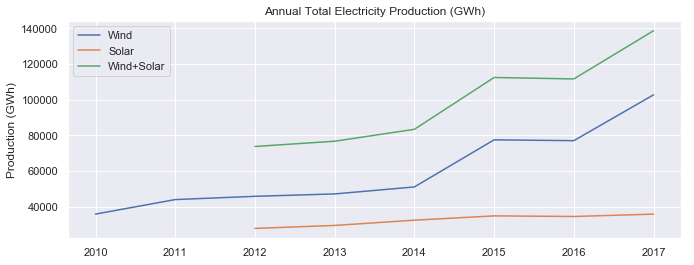

In [24]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'

# Plot  time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_annual[nm], label=nm)

ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Annual Total Electricity Production (GWh)');

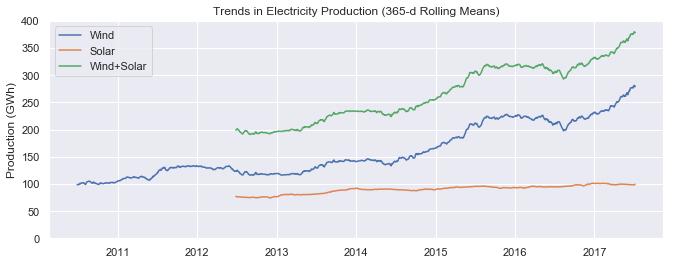

In [25]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

#  compute the 365-day rolling mean of our OPSD data.
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
# Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)
ax.legend()
ax.set_ylabel('Production (GWh)')
ax.set_title('Trends in Electricity Production (365-d Rolling Means)');

We can see a small increasing trend in solar power production and a large increasing trend in wind power production, as Germany continues to expand its capacity in those sectors.

### Additive and multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

Additive time series:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/ <br>
https://blog.bigml.com/2017/07/12/introduction-to-time-series/ <br>
https://docs.oracle.com/cd/E40248_01/epm.1112/cb_pred_user/frameset.htm?ch03s04s01.html
    
In additive case, the amplitude of the seasonal variation is independent of the level, whereas in the multiplicative it is the magnitude of variation is larger when the level of the series is higher. The following figure highlights this:

In [85]:
Image(url ='https://docs.oracle.com/cd/E40248_01/epm.1112/cb_pred_user/images/graphics/seasonaltypes.gif', width=700, height=700)

### Decompose a time series into its components

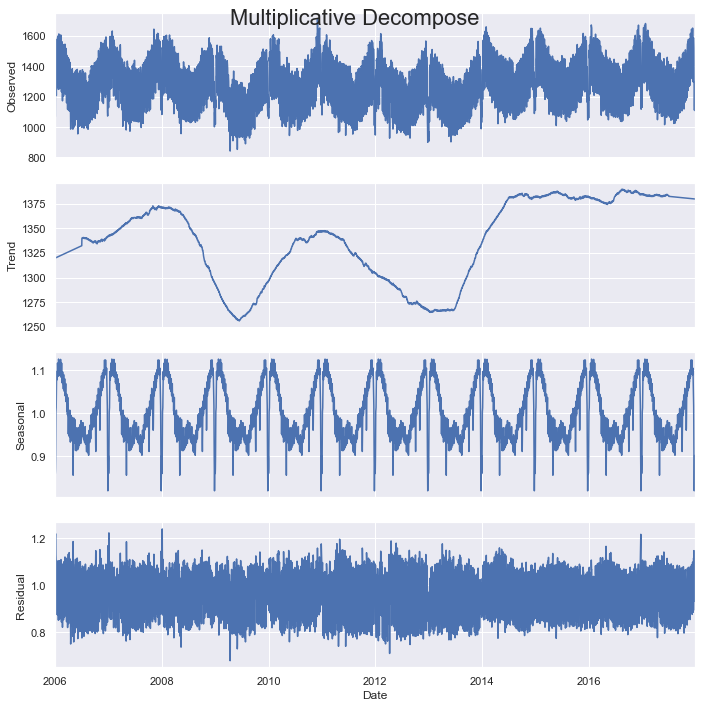

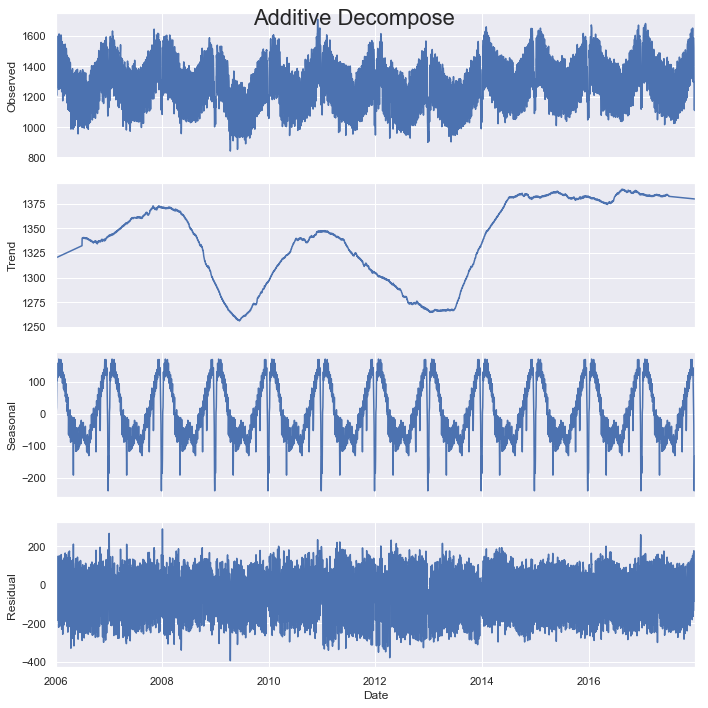

In [26]:
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
from statsmodels.tsa.seasonal import seasonal_decompose
#from dateutil.parser import parse

df=opsd_daily.iloc[:,[0,4]]

#df.head()
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['Consumption'], model='multiplicative', extrapolate_trend='freq', freq=365)

# Additive Decomposition
result_add = seasonal_decompose(df['Consumption'], model='additive', extrapolate_trend='freq', freq=365)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

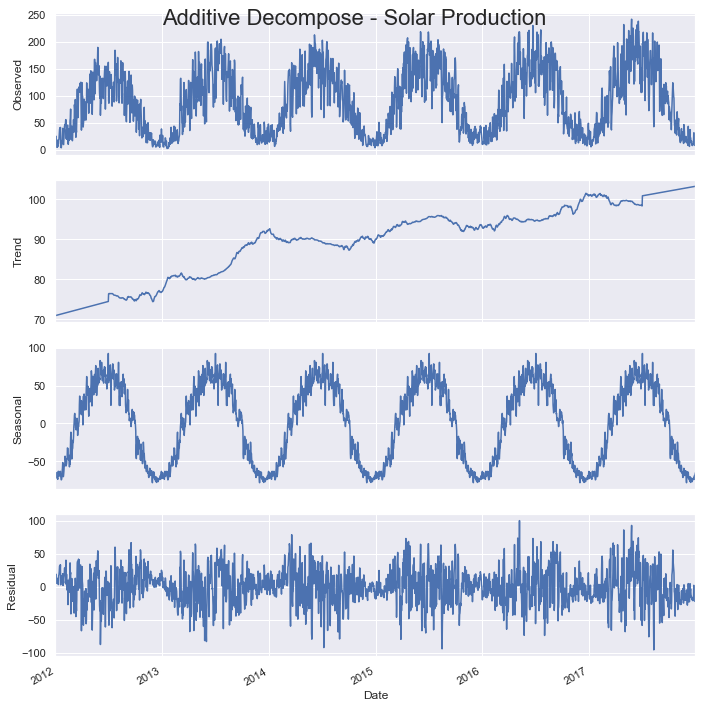

In [33]:
# Additive Decomposition for Solar
df=opsd_daily[['Solar', 'Year']].dropna()
# Plot
result_add = seasonal_decompose(df['Solar'], model='additive', extrapolate_trend='freq', freq=365)
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose - Solar Production', fontsize=22)
plt.show()

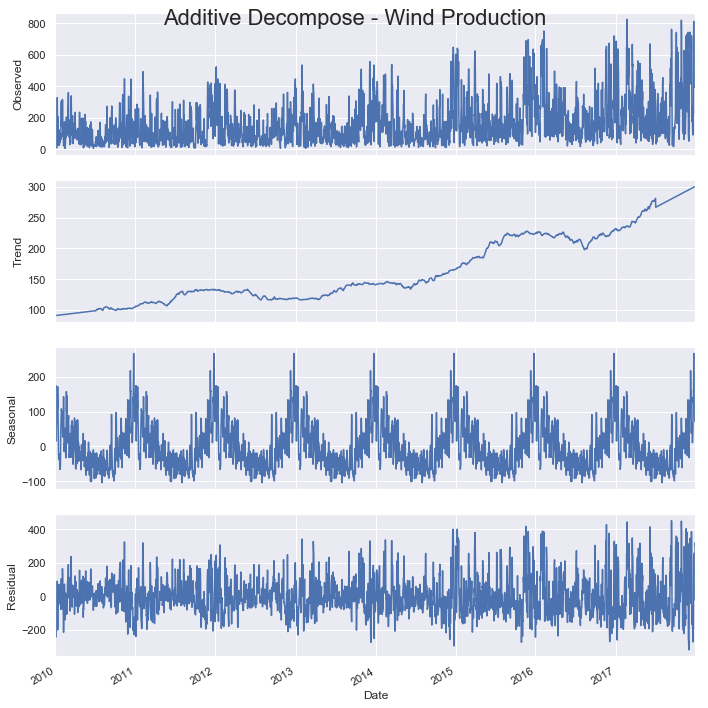

In [34]:
# Additive Decomposition for Wind
df=opsd_daily[['Wind', 'Year']].dropna()
# Plot
result_add = seasonal_decompose(df['Wind'],model='additive', extrapolate_trend='freq', freq=365)
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose - Wind Production', fontsize=22)
plt.show()

#### Identifying Trends in Time Series

https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial <br>
https://datascience.stackexchange.com/questions/40572/how-do-you-detect-seasonalitymultiplicative-or-additive-in-a-time-series-data

One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

If the seasonality is additive, then the result of subtract the moving average (rolling mean) will have almost similar fluctuations in magnitude.
If it is multiplicative, then the division result has such a property.

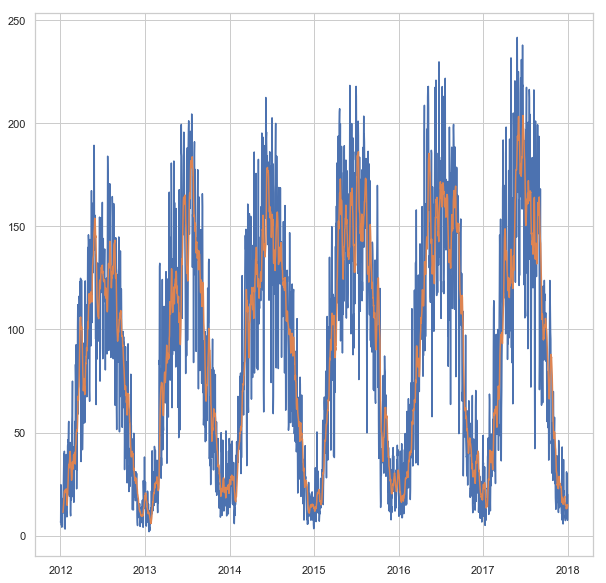

In [76]:
solar = opsd_daily['Solar'].dropna()
movingAverage =  solar.rolling(window=12).mean()
plt.plot(solar)
plt.plot(movingAverage)
plt.show()

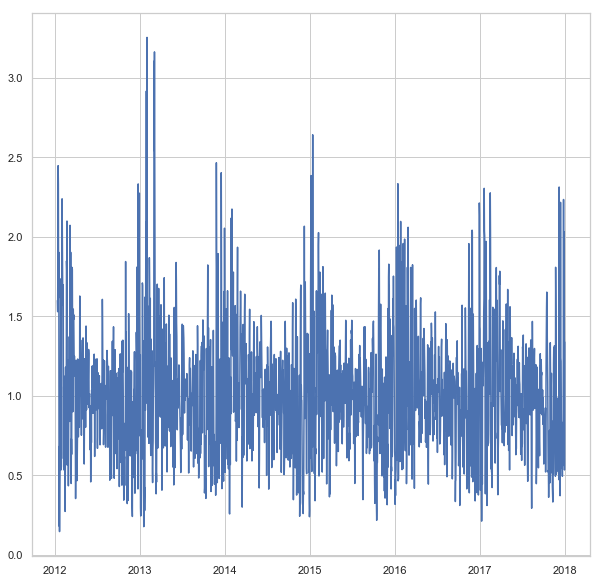

In [77]:
plt.plot(solar/movingAverage)
plt.show()

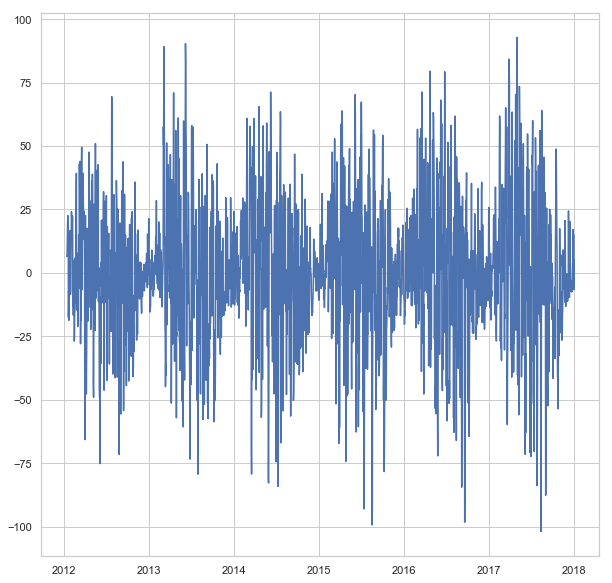

In [78]:
plt.plot(solar-movingAverage)
plt.show()

## Phase 2 - Stationarize the Series

The observations in a stationary time series are not dependent on time.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

### Check Stationarity of Time Series

There are two ways you can check the stationarity of a time series. The first is by looking at the data. By visualizing the data it should be easy to identify a changing mean or variation in the data. For a more accurate assessment there is the Dickey-Fuller test.

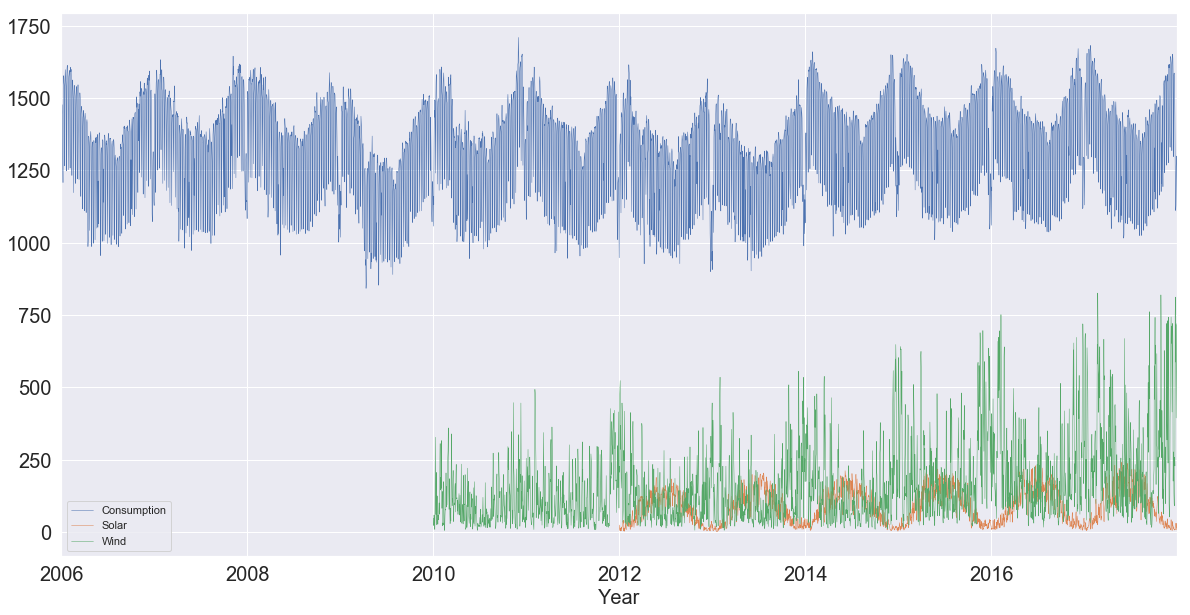

In [35]:
# In a Stationary time series, there is no visible trend
opsd_df=opsd_daily[ ['Consumption', 'Solar', 'Wind']]
opsd_df.plot(figsize=(20,10), linewidth=0.5, fontsize=20)
plt.xlabel('Year', fontsize=20);

#### 1. Augmented Dickey-Fuller test
https://machinelearningmastery.com/time-series-data-stationary-python/


The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

    Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


Unit root indicates that the statistical properties of a given series are not constant with time, which is the condition for stationary time series. 


    p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [36]:
# https://machinelearningmastery.com/time-series-data-stationary-python/
from statsmodels.tsa.stattools import adfuller

result = adfuller(opsd_daily['Consumption'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1]  > 0.05 :
    print('Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.')
elif result[1] < 0.05 :
    print('Reject the null hypothesis (H0), the data does not have a unit root and is stationary.')

ADF Statistic: -6.239148
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [37]:
test_df = opsd_daily['Solar'].dropna()
result = adfuller(test_df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1]  > 0.05 :
    print('Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.')
elif result[1] < 0.05 :
    print('Reject the null hypothesis (H0), the data does not have a unit root and is stationary.')

ADF Statistic: -2.544108
p-value: 0.105108
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.


In [38]:
test_df = opsd_daily['Wind'].dropna()
result = adfuller(test_df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1]  > 0.05 :
    print('Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.')
elif result[1] < 0.05 :
    print('Reject the null hypothesis (H0), the data does not have a unit root and is stationary.')

ADF Statistic: -4.523306
p-value: 0.000178
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


#### Using a function

In [39]:
# https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
def test_stationarity(timeseries):

    # Determing rolling statistics , monthly -> window=12
    
    rolmean =  timeseries.rolling( window=12).mean()
    rolstd = timeseries.rolling( window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(15, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput )

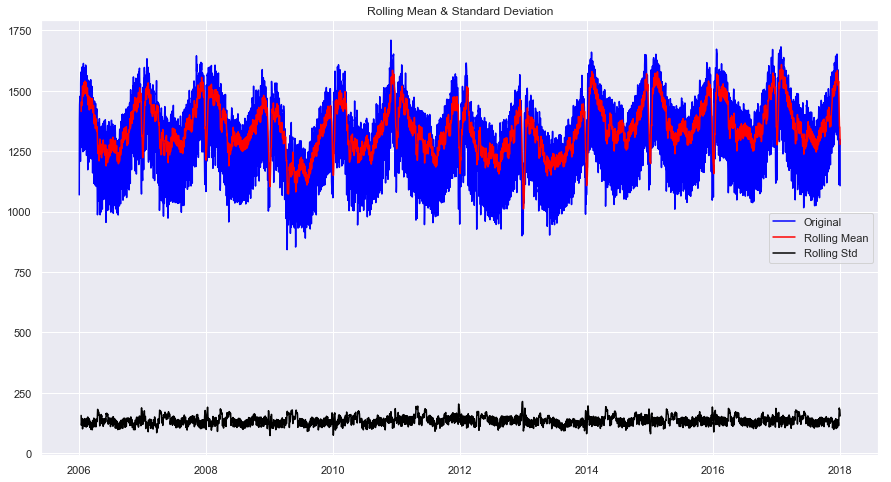

Results of Dickey-Fuller Test:
Test Statistic                -6.239148e+00
p-value                        4.744055e-08
#Lags Used                     3.100000e+01
Number of Observations Used    4.351000e+03
Critical Value (1%)           -3.431854e+00
Critical Value (5%)           -2.862205e+00
Critical Value (10%)          -2.567124e+00
dtype: float64


In [40]:
test_stationarity(opsd_daily['Consumption'])

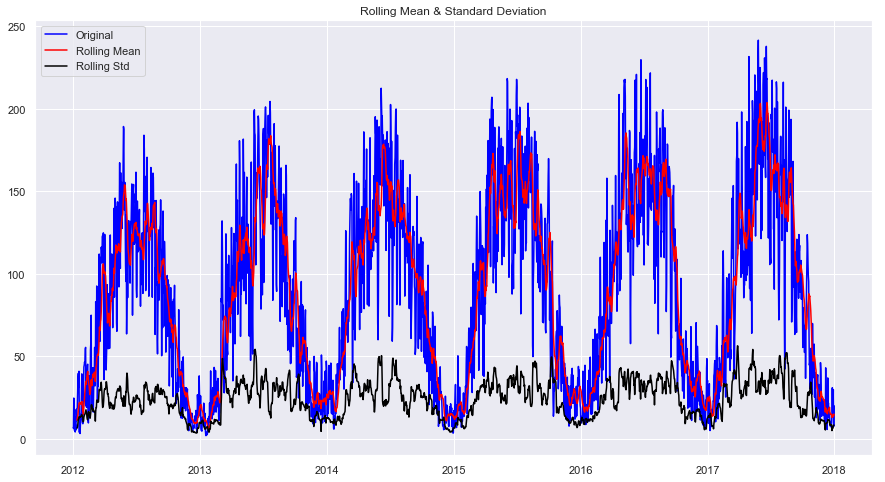

Results of Dickey-Fuller Test:
Test Statistic                   -2.544108
p-value                           0.105108
#Lags Used                       18.000000
Number of Observations Used    2169.000000
Critical Value (1%)              -3.433368
Critical Value (5%)              -2.862873
Critical Value (10%)             -2.567480
dtype: float64


In [41]:
test_stationarity(opsd_daily['Solar'].dropna())

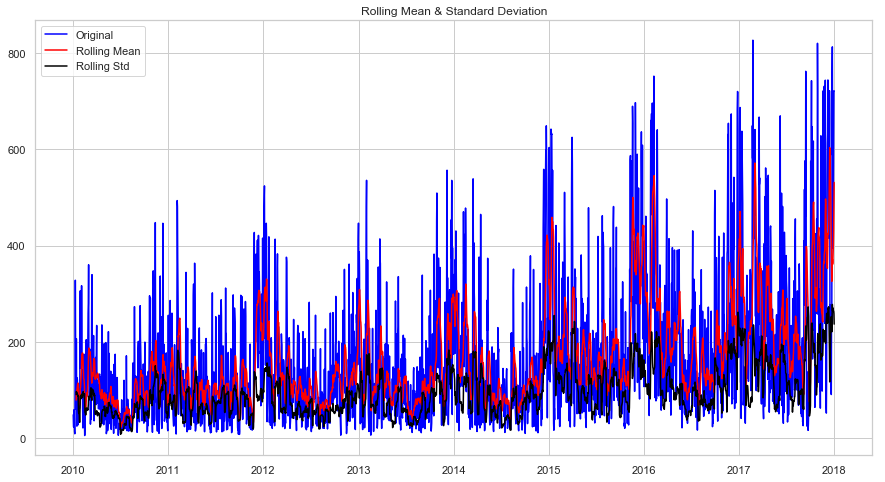

Results of Dickey-Fuller Test:
Test Statistic                   -4.523306
p-value                           0.000178
#Lags Used                       22.000000
Number of Observations Used    2897.000000
Critical Value (1%)              -3.432609
Critical Value (5%)              -2.862538
Critical Value (10%)             -2.567301
dtype: float64


In [84]:
test_stationarity(opsd_daily['Wind'].dropna())

#### Using a class

In [42]:
# http://www.insightsbot.com/blog/1MH61d/augmented-dickey-fuller-test-in-python

class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
    def ADF_Stationarity_Test(self, timeseries, printResults = True):

            #Dickey-Fuller test:
            adfTest = adfuller(timeseries, autolag='AIC')

            self.pValue = adfTest[1]

            if (self.pValue<self.SignificanceLevel):
                self.isStationary = True
            else:
                self.isStationary = False

            if printResults:
                dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])

                #Add Critical Values
                for key,value in adfTest[4].items():
                    dfResults['Critical Value (%s)'%key] = value

                print('Augmented Dickey-Fuller Test Results:')
                print(dfResults)    

In [43]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(opsd_daily['Consumption'], printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -6.239148e+00
P-Value                 4.744055e-08
# Lags Used             3.100000e+01
# Observations Used     4.351000e+03
Critical Value (1%)    -3.431854e+00
Critical Value (5%)    -2.862205e+00
Critical Value (10%)   -2.567124e+00
dtype: float64
Is the time series stationary? True


In [44]:
sTest.ADF_Stationarity_Test(opsd_daily['Solar'].dropna(), printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic        -2.544108
P-Value                    0.105108
# Lags Used               18.000000
# Observations Used     2169.000000
Critical Value (1%)       -3.433368
Critical Value (5%)       -2.862873
Critical Value (10%)      -2.567480
dtype: float64
Is the time series stationary? False


In [45]:
sTest.ADF_Stationarity_Test(opsd_daily['Wind'].dropna(), printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic        -4.523306
P-Value                    0.000178
# Lags Used               22.000000
# Observations Used     2897.000000
Critical Value (1%)       -3.432609
Critical Value (5%)       -2.862538
Critical Value (10%)      -2.567301
dtype: float64
Is the time series stationary? True


#### 2. KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.
The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [69]:
# https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

Test for stationarity: If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary).

In [70]:
kpss_test(opsd_daily['Consumption'])

Results of KPSS Test:
Test Statistic            0.729859
p-value                   0.010831
Lags Used                31.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


For the Consumption data, the value of the test statistic is greater than the critical value at first 3 confidence intervals, and hence we can say that the series is not stationary.

In [71]:
kpss_test(opsd_daily['Solar'].dropna())

Results of KPSS Test:
Test Statistic            0.206141
p-value                   0.100000
Lags Used                26.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


For the Solar data, the value of the test statistic is less than the critical value at all confidence intervals, and hence we can say that the series is stationary.

In [72]:
kpss_test(opsd_daily['Wind'].dropna())

Results of KPSS Test:
Test Statistic            4.218988
p-value                   0.010000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


For the Wind data, the value of the test statistic is greater than the critical value at all confidence intervals, and hence we can say that the series is not stationary.

####  Both the tests showed contradictory results.

In summary, the ADF test has an alternate hypothesis of linear or difference stationary, while the KPSS test identifies trend-stationarity in a series.

https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/
#### Types of Stationarity
Let us understand the different types of stationarities and how to interpret the results of the above tests.

- Strict Stationary: A strict stationary series satisfies the mathematical definition of a stationary process. 
    For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.
- Trend Stationary: A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.
- Difference Stationary: A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.
    

It’s always better to apply both the tests, so that we are sure that the series is truly stationary. Let us look at the possible outcomes of applying these stationary tests.

-    Case 1: Both tests conclude that the series is not stationary -> series is not stationary
-    Case 2: Both tests conclude that the series is stationary -> series is stationary
-    Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
-    Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary


At the Result:
- Consumption and Wind are difference stationay
- Solar is trend stationary

### Making a Time Series Stationary

Always keep in mind that in order to use time series forecasting models, it is necessary to convert any non-stationary series to a stationary series first.

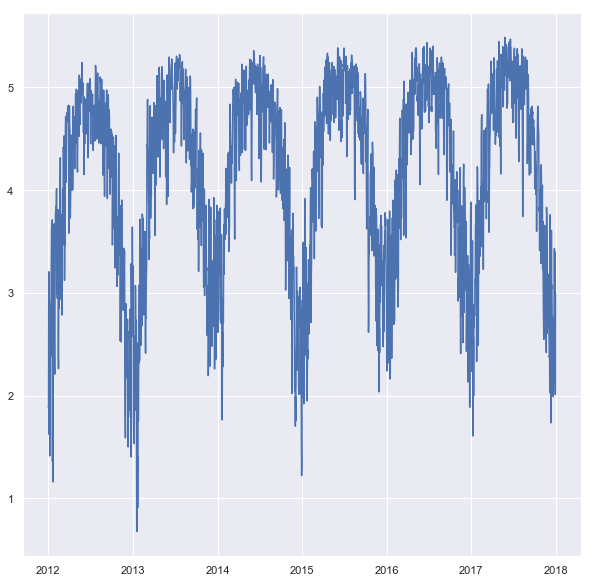

In [46]:
# Estimating Trend  for Solar, it's not staionary
solar_logScale = np.log(opsd_daily['Solar'].dropna())

plt.plot(solar_logScale)

### Transformation Method 1

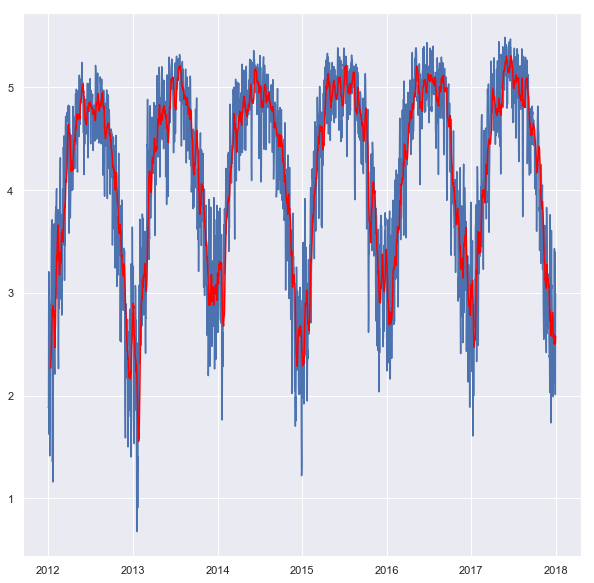

In [47]:
movingAverage =  solar_logScale.rolling(window=12).mean()
movingSTD = solar_logScale.rolling(window=12).std()
plt.plot(solar_logScale)
plt.plot(movingAverage, color='red')

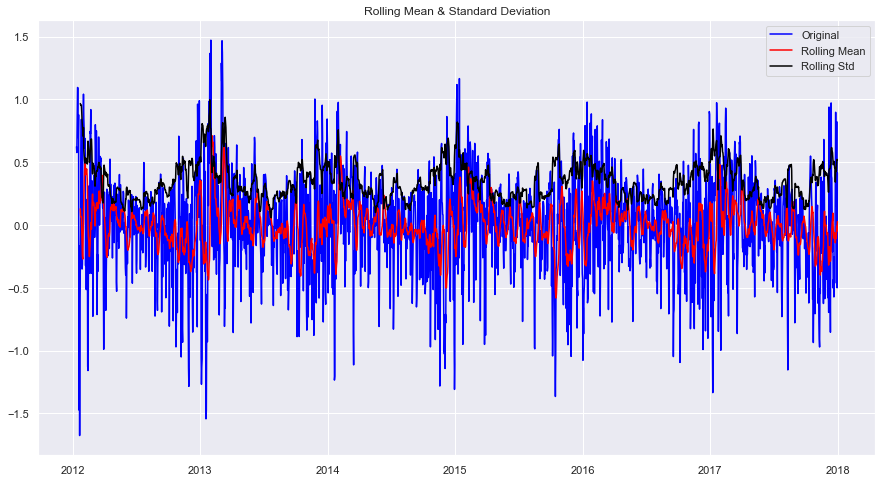

Results of Dickey-Fuller Test:
Test Statistic                -1.174205e+01
p-value                        1.266849e-21
#Lags Used                     1.600000e+01
Number of Observations Used    2.160000e+03
Critical Value (1%)           -3.433381e+00
Critical Value (5%)           -2.862879e+00
Critical Value (10%)          -2.567483e+00
dtype: float64


In [48]:
new_movingAverage = solar_logScale - movingAverage
test_stationarity(new_movingAverage.dropna())

In [49]:
sTest.ADF_Stationarity_Test(new_movingAverage.dropna(), printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.174205e+01
P-Value                 1.266849e-21
# Lags Used             1.600000e+01
# Observations Used     2.160000e+03
Critical Value (1%)    -3.433381e+00
Critical Value (5%)    -2.862879e+00
Critical Value (10%)   -2.567483e+00
dtype: float64
Is the time series stationary? True


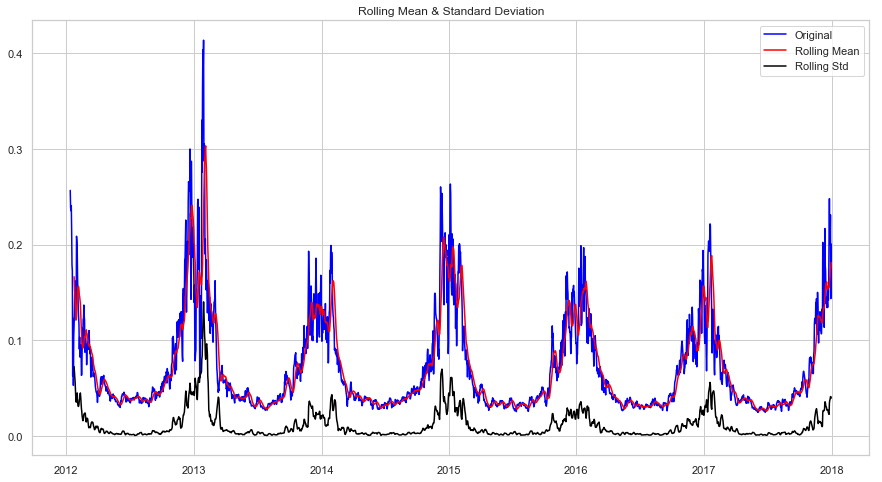

Results of Dickey-Fuller Test:
Test Statistic                   -3.055657
p-value                           0.030014
#Lags Used                       26.000000
Number of Observations Used    2150.000000
Critical Value (1%)              -3.433395
Critical Value (5%)              -2.862885
Critical Value (10%)             -2.567486
dtype: float64


In [79]:
new_movingAverage2 = solar_logScale / movingAverage
test_stationarity(new_movingAverage2.dropna())

In [80]:
sTest.ADF_Stationarity_Test(new_movingAverage2.dropna(), printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic        -3.055657
P-Value                    0.030014
# Lags Used               26.000000
# Observations Used     2150.000000
Critical Value (1%)       -3.433395
Critical Value (5%)       -2.862885
Critical Value (10%)      -2.567486
dtype: float64
Is the time series stationary? True


#### Transformation Method 2

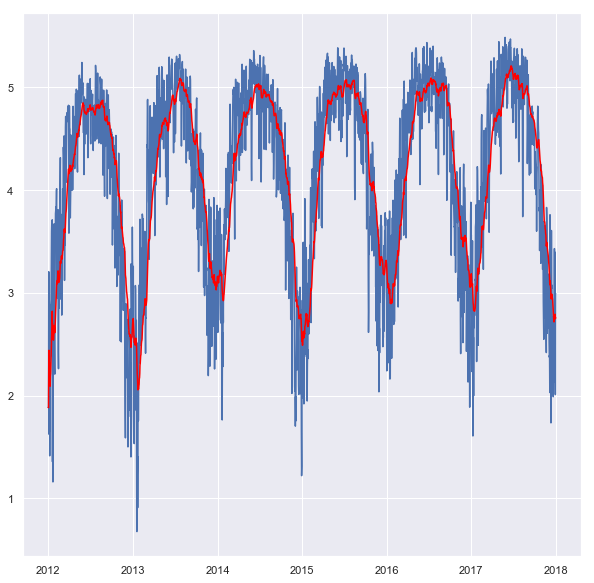

In [50]:
Weighted_Average = solar_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(solar_logScale)
plt.plot(Weighted_Average, color='red')

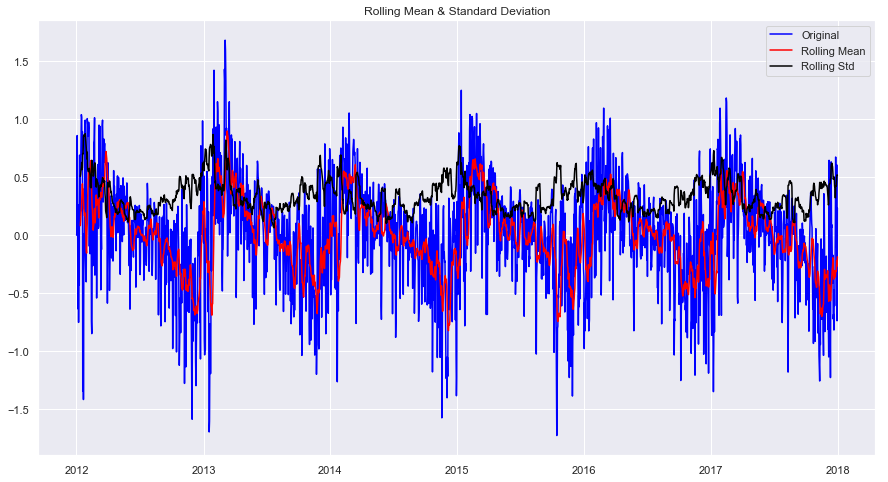

Results of Dickey-Fuller Test:
Test Statistic                   -4.975394
p-value                           0.000025
#Lags Used                       20.000000
Number of Observations Used    2167.000000
Critical Value (1%)              -3.433371
Critical Value (5%)              -2.862875
Critical Value (10%)             -2.567481
dtype: float64


In [51]:
new_WeightAverage = solar_logScale - Weighted_Average
test_stationarity(new_WeightAverage.dropna())

In [52]:
sTest.ADF_Stationarity_Test(new_WeightAverage.dropna(), printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic        -4.975394
P-Value                    0.000025
# Lags Used               20.000000
# Observations Used     2167.000000
Critical Value (1%)       -3.433371
Critical Value (5%)       -2.862875
Critical Value (10%)      -2.567481
dtype: float64
Is the time series stationary? True


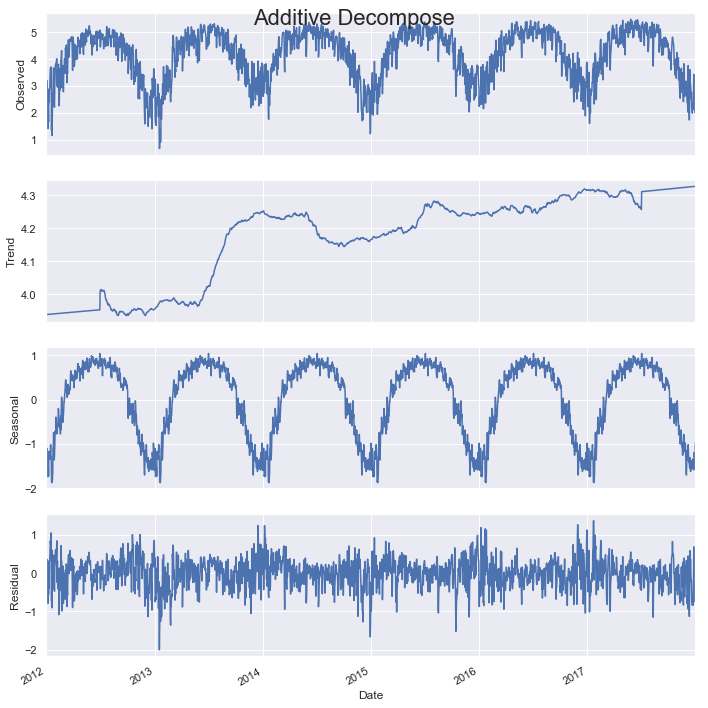

In [53]:
# Additive Decomposition
result_add = seasonal_decompose(solar_logScale, model='additive', extrapolate_trend='freq', freq=365)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## PHASE 3 - Create ACF and PACF Plots

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. 
This plot is sometimes called a correlogram or an autocorrelation plot.

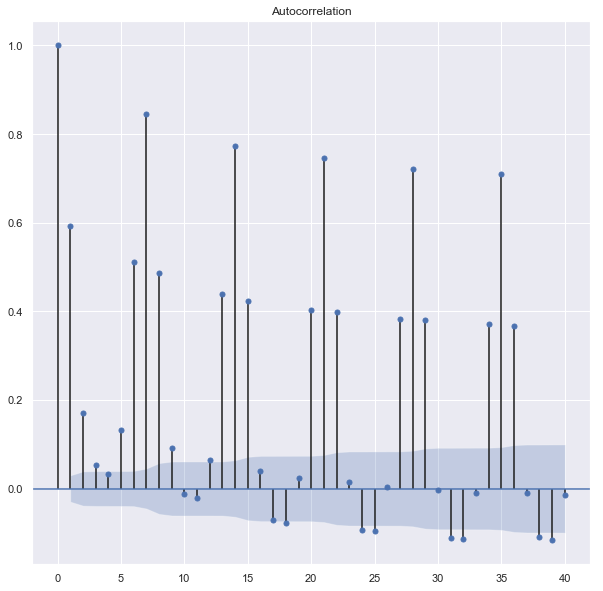

In [54]:
#import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
tsaplots.plot_acf(opsd_daily['Consumption'], lags=40)
plt.show()

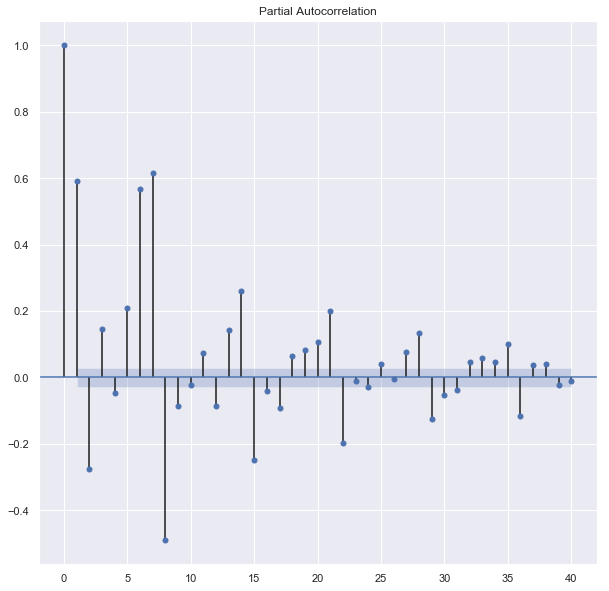

In [55]:
tsaplots.plot_pacf(opsd_daily['Consumption'], lags=40)
plt.show()

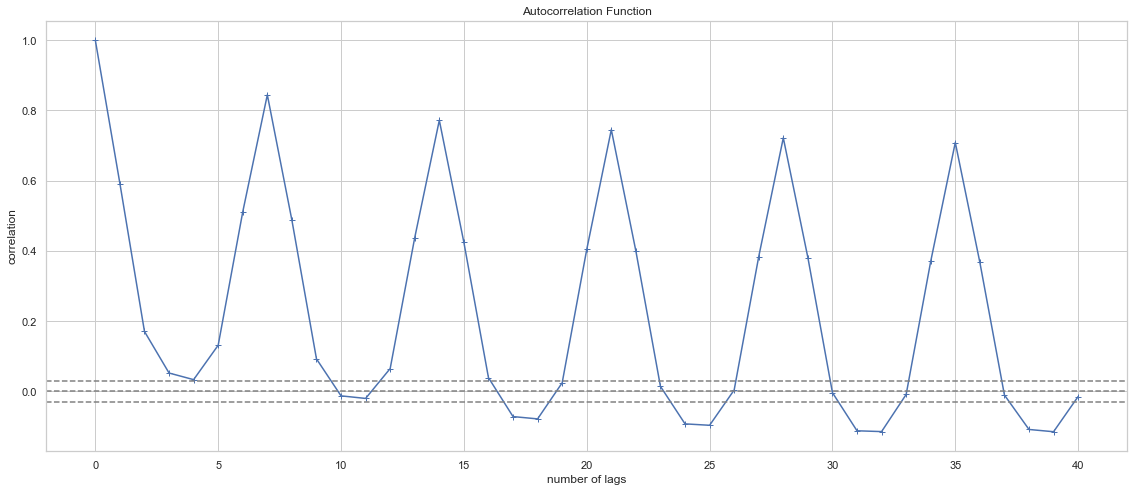

In [56]:
# https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf
y= opsd_daily['Consumption']
#calling auto correlation function
lag_acf = acf(y, nlags=40)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In the above correlation plot dotted lines represent the confidence band, with center dotted line represents mean and upper and lower dotted line represent boundries based on 95% confidence interval. Cuts off after the lag 4 - > MA(4) model

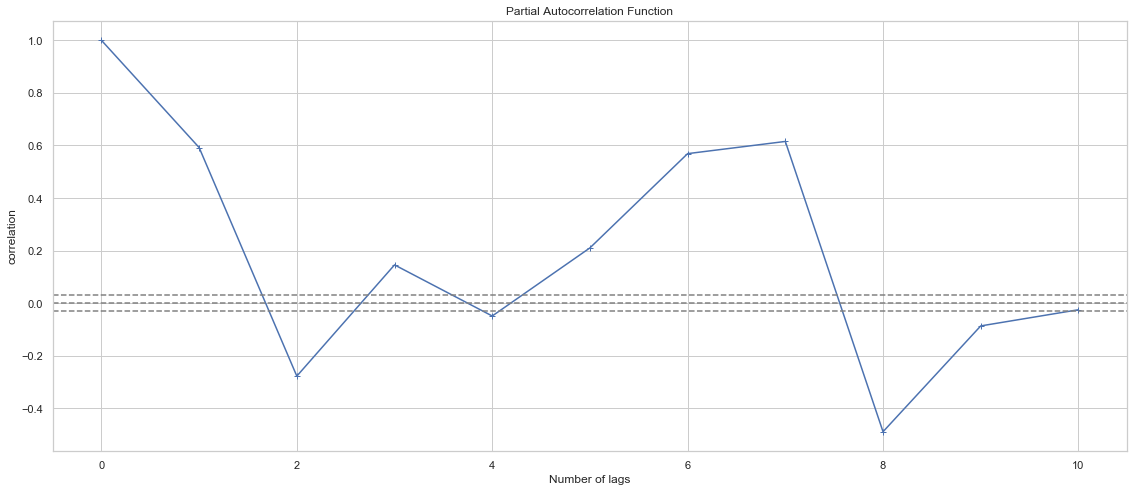

In [57]:
#calling partial correlation function
y=opsd_daily['Consumption']
lag_pacf = pacf(y, nlags=10, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In the above plot we can see that lags upto 1.7 have good correlation before the plot first cuts the upper confidence interval. This is our p value i.e the order of our AR process. We can model given AR process using linear combination of first 1.7 lags

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.612346e+01
P-Value                 4.869996e-29
# Lags Used             1.500000e+01
# Observations Used     2.171000e+03
Critical Value (1%)    -3.433366e+00
Critical Value (5%)    -2.862872e+00
Critical Value (10%)   -2.567479e+00
dtype: float64
Is the time series stationary? True


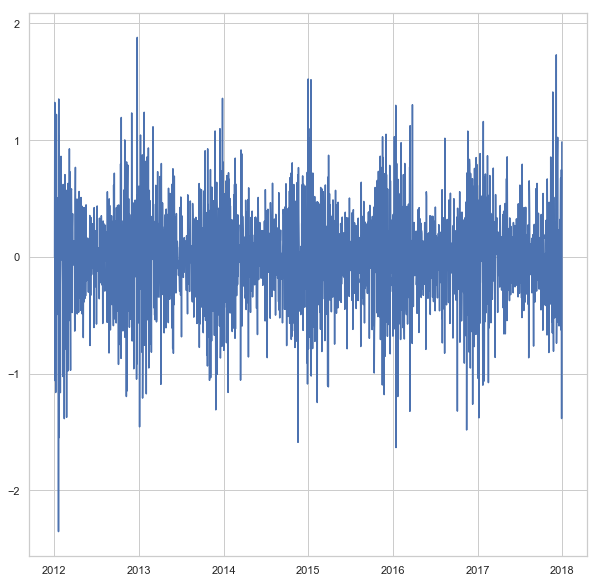

In [58]:
solar_logShift = solar_logScale - solar_logScale.shift()
plt.plot(solar_logShift)
sTest.ADF_Stationarity_Test(solar_logShift.dropna(), printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

## PHASE 4 - BUILD ARIMA MODEL

In [59]:
A seasonal ARIMA model is classified as an ARIMA(p,d,q)x(P,D,Q) model, 
where P=number of seasonal autoregressive (SAR) terms, 
D=number of seasonal differences, 
Q=number of seasonal moving average (SMA) terms 

value P  -> PACF; value Q -> ACF

SyntaxError: invalid syntax (<ipython-input-59-04a7251e48af>, line 1)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# AR MODEL
model = ARIMA(opsd_daily['Consumption'], order=(2,0,0))
results_AR=model.fit(disp=-1)
plt.plot(opsd_daily['Consumption'])
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum( result_add.resid ) )
print('Plotting AR model')

In [ ]:
# MA MODEL
model = ARIMA(opsd_daily['Consumption'], order=(0,0,4))
results_MA = model.fit(disp=-1)
plt.plot(opsd_daily['Consumption'])
plt.plot(results_MA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum( result_add.resid ) )
print('Plotting MA model')

In [ ]:
# ARIMA MODEL
model = ARIMA(opsd_daily['Consumption'], order=(2,0,4))
results_ARIMA = model.fit(disp=-1)
plt.plot(opsd_daily['Consumption'])
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum( result_add.resid ) )
print('Plotting ARIMA model')

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

## PHASE 5 - MAKE PREDICTION

In [ ]:
# Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

In [ ]:
predictions_ARIMA_log = pd.Series(opsd_daily['Consumption'].ix[0], index=opsd_daily['Consumption'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

#### REFERENCES: <br>
    https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/   <br>
    https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8  <br>
    https://maelfabien.github.io/statistics/TimeSeries1/#i-what-is-a-time-series